# **Relatório 02 - Método Mínimos Quadrados**
##### **Gabriel van Loon Bodê da Costa Dourado Fuentes Rojas**
##### **SME0104 - Cálculo Numérico**
##### **Docente: Cynthia de Oliveira Lage Ferreira** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# **Resumo do Relatório**

Neste relatório iremos estar implementando e utilizando o Método dos Mínimos Quadrados em um conjunto de dados discretos obtidos no Banco de Dados Climatológicos ([clima.icea.gov.br](http://clima.icea.gov.br/clima/index.php)).

No início do relatório iremos revisitar alguns conceitos necessários da Algebra Linear e também do que se trata o método.

Em seguida iremos estar implementando uma aproximação polinomial e uma aproximação polinomial trigonométrica a fim de verificar qual dos dois métodos obtém um melhor resultado para aproximar os dados.

# **Espaços Vetoriais com Produtos Internos**

Como bem lembramos, grande parte do curso de Algebra Linear girou em torno dos espaços vetoriais e suas diferentes propriedades sendo, dentre elas, a existência ou não de um produto interno e também a questão de subspaços vetoriais. Abaixo vamos citar alguns dos conceitos que serão necessários para as próximas sessões.

**Produto Interno**

Seja $V$ um espaço vetorial, dizemos que $V$ é munido de produto interno se existe uma operação $\langle \cdot,\cdot \rangle: V \times V \to \mathbb{R}$ que satisfaz as seguintes propriedades:

**a)** $ \langle v, \alpha w + \beta u \rangle = \alpha \langle v, w \rangle + \beta \langle v, u \rangle $

**b)** $ \langle v, w \rangle = \langle w, v \rangle $

**C)** $\forall v \neq 0$, $ \langle v, v \rangle > 0$

**Norma Induzida**

Seja $V$ um espaço vetorial munido de produto interno, podemos dizer que a norma de um vetor $v \in V$ pode ser dada pela norma induzida do produto interno pela seguinte forma:  $||v|| = \sqrt{ \langle v,v \rangle }$

**Distância**

Seja $V$ um espaço vetorial munido de produto interno e norma, podemos definir a distância como uma operação $dist(v,w):V \times V \to \mathbb{R}$ utilizando a normal, tal que: $dist(v,w) = ||v - w|| = ||w - v||$

**Projeção Ortogonal**

Seja $V$ um espaço vetorial munido de produto interno e $v$ e $w$ vetores não nulos contidos subspaços de $V$, podemos calcular a projeção ortogonal de $v$ em $w$ da seguinte forma:

$proj_wv = \dfrac{\langle v, w \rangle}{||w||} w = \dfrac{\langle v, w \rangle}{\langle w, w \rangle} w$

Além disso, seja $V$ um $\mathbb{K}$ espaço vetorial munido de produto interno e $W \subset V$ um subespaço de $V$ e $w_0 \in W$ a projeção um vetor $v \in V$ não nulo em $W$, são válidas as seguintes afirmações:

**a)** $( v - w_0) \in W^{\perp}$

**b)** $|| v - w_0 || < || v - w||$ para todo $w \neq w_0 \in W$


**Distância Mínima**

Seja $V$ um espaço de dimensão finita contido em um espaço vetorial $E$. Seja $u \in E$, dizemos que $v \in V$, projeção ortogonal de $u$ em $V$ é a melhor aproximação possível de $u$ em $V$.


**Uso de Projeção Ortogonal em Sistemas Incompatíveis**

Podemos utilizar projeções ortogonais para determinar a melhor solução possível em Sistemas Lineares Incompatíveis. Seja um sistema incompatível do tipo:

\begin{cases} 
  a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1 \\ 
  a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2  \\ 
  ... \\
  a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n = b_m \\
\end{cases} 

Podemos separar esse sistema em uma forma matricial do tipo $Ax = B$ com $m$ equações e $n$ incógnitas e, como o mesmo é incompatível, não existe nenhum $x \in \mathbb{K}^n$ que seja sua solução. 

Porém, podemos buscar um $y \in \mathbb{K}^n$ de forma que $Ay$ seja o mais próximo possível de $B$. 

Escrevendo $Ay$ na forma matricial, podemos considerar as colunas de $A$ como vetores tais que $B_a = \{ A_1, A_2, ..., A_n \}$ geram um espaço $\mathbb{K}^n$ conhecido e contido em $\mathbb{K}^m$. 

Como $B \in \mathbb{K}^m$ e $\mathbb{K}^n \subseteq \mathbb{K}^m$, sabemos que o melhor valor de $y$ será dado pela projeção de $b$ em $\mathbb{K}^n$.

Além disso, encontrar a projeção ortogonal de $b$ em $y$ é equivalente à dizer que queremos encontrar $B_2 \in \mathbb{K}^{n\perp}$ resolvendo a seguinte equação:

\begin{equation} \langle B - Ay, A \rangle = 0 \end{equation}

\begin{equation} \langle B , A \rangle - \langle Ay, A \rangle= 0 \end{equation}

\begin{equation} \langle B , A \rangle = \langle Ay, A \rangle \end{equation}

Obtendo então o seguinte sistema:

\begin{cases} 
\langle A_1,A_1 \rangle y_1 + \langle A_2,A_1 \rangle y_2 + ... + \langle A_n,A_1 \rangle y_n = \langle B,A_1 \rangle \\ 
\langle A_1,A_2 \rangle y_1 + \langle A_2,A_2 \rangle y_2 + ... + \langle A_n,A_2 \rangle y_n = \langle B,A_2 \rangle \\ 
... \\
\langle A_1,A_n \rangle y_1 + \langle A_2,A_n \rangle y_2 + ... + \langle A_n,A_n \rangle y_n = \langle B,A_n \rangle \\ 
\end{cases} 

É possível ver que o sistema acima também pode ser reescrito com a seguinte forma matricial: $A^TAY = A^TB$ e, portanto, basta resolver o sistema linear para encontrar os melhores valores possível de $y$.



# **Método dos Mínimos Quadrados**

Seja $V$ um espaço de funções conhecidas e $A$ um conjunto de amostras de uma função $f$ tal que $A = \{ (x_0,y_0), (x_1,y_1), ..., (x_n,y_n) \}$. O método dos mínimos quadrados permite que busquemos o representante $v \in V$ que melhor aproxima $f$ ao buscarmos a projeção de $f$ em $V$.

Existem diferentes tipos de espaços de funções $V$ que podem ser utilizados para realizar a aproximação, dentre eles o espaço de funções polinomial $P_m$ ou o espaço de polinômios trigônométricos $T_m$. Vamos ver a seguir como estas aproximações funcionam e em seguida demonstrá-las na prática.


# **Aproximação Polinomial**

Seja $X$ um conjunto amostral de uma função $f(x)$ desconhecida contendo $(n+1)$ pares de pontos $(x_i, y_i)$, com $x_i$ todos distintos. Queremos encontrar um polinômio $P \in P_m$ que melhor aproxime os valores de $P(x_i) \approx f(x_i)$.

Teremos, portanto, um sistema linear do seguinte tipo:

\begin{cases} 
P(x_0) = a_0 + a_1 x_0 + a_2 x_0^2 + ... + a_m x_0^m \approx f(x_0) \\
P(x_1) = a_0 + a_1 x_1 + a_2 x_1^2 + ... + a_m x_1^m \approx f(x_1) \\
... \\
P(x_n) = a_0 + a_1 x_n + a_2 x_n^2 + ... + a_m x_n^m \approx f(x_n) 
\end{cases} 

Além disso, podemos descrever esse problema na forma matricial $Ax = F$, em que $F = (f(x_0), f(x_1), ... , f(x_n)) \in \mathbb{R}^{n}$, $A$ é a já vista *Matriz de Vandermonde* e, por fim, $x \in \mathbb{R}^{m}$ representa a matriz colunas com os coeficientes $a_i$ que queremos determinar.

Como já sabemos, a *Matriz de Vandermonde* é uma matriz linearmente independente uma vez que todos os $x_i$ utilizamos como entradas são distintos e, portanto, geram uma base para o espaço $\mathbb{R}^{m}$. Podemos então, como já foi visto na sessão anterior, buscar a projeção ($y$) de $F$ no espaço gerado por $A$ por meio da seguinte equação:

 $A^TAy = A^TF$

Além disso, podemos simplificar a equação acima fazendo a decomposição $QR$ da matriz $A$ tal que:

\begin{equation}
  A^TAy = A^TF \\
 (QR)^T(QR)y = (QR)^TF \\
  R^TQ^TQRy =  R^TQ^TF \\
  Ry = Q^TF
\end{equation}

Como $R$ é uma matriz diagonal superior, a solução do sistema se torna uma tarefa trivial de ser resolvida. A seguir temos uma implementação em python do método dos mínimos quadrados utilizando o sistema visto acima.

In [ ]:
def lstqs_polinomial(x, y, m = 2):
  if m > (len(x)-1):
    print('Dimensão de x não é grande o suficiente!')
    return

  n     = len(x)
  X     = np.vander(x, N=m)
  Q,R   = np.linalg.qr(X)
  
  B   = Q.T @ ( np.reshape(y,(n,1)) )
  A   = R
  return np.linalg.solve(A,B).flatten()

Além disso, vamos deixar pré-criado, as funções `get_y` que iremos utilizar para calcular $y$ baseado nos coeficientes retornados pela função acima e também `plot_predictions` que iremos utilizar para **visualizar nossa nuvem de pontos em comparação com o polinômio encontrado** pelo método dos mínimos quadrados.  

In [ ]:
def get_y(x, coefs):
  m = len(coefs)-1
  y   = (coefs[0]*x**m)
  for i in range(1, len(coefs)):
    y += (coefs[i]*x**(m-i))
  return y

def plot_predictions(x,y, m1=2, m2=3, m3=4):
  x_pred  = np.linspace(x[0],x[-1],1000)

  # aproximando por m=m1
  coefs = lstqs_polinomial(x,y, m=m1)
  y_1   = get_y(x,coefs)
  err_1 = sum(abs(y_1 - y))
  y_1  = get_y(x_pred,coefs)

  # Aproximando por m=m2
  coefs = lstqs_polinomial(x,y, m=m2)
  y_2   = get_y(x,coefs)
  err_2 = sum(abs(y_2 - y))
  y_2  = get_y(x_pred,coefs)

  # Aproximando por m=m3
  coefs = lstqs_polinomial(x,y, m=m3)
  y_3   = get_y(x,coefs)
  err_3 = sum(abs(y_3 - y))
  y_3  = get_y(x_pred,coefs)
  #y_3  = (coefs[0]*x**3) + (coefs[1]*x**2) + (coefs[2]*x) + coefs[3]

  # Plotando os resultados obtidos
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
  plt.subplots_adjust(wspace=0.3, hspace=0.2)

  ax1.plot(x,y,   'bo')
  ax1.plot(x_pred,y_1, 'r')
  ax1.set_title("Aproximando com m = {}, err={:.5f}".format(m1, err_1))

  ax2.plot(x,y,   'bo')
  ax2.plot(x_pred,y_2, 'r')
  ax2.set_title("Aproximando com m = {},  err={:.5f}".format(m2, err_2))

  ax3.plot(x,y,   'bo')
  ax3.plot(x_pred,y_3, 'r')
  ax3.set_title("Aproximando com m = {},  err={:.5f}".format(m3, err_3))
  plt.show()

Primeiramente, para efeitos de teste, vamos criar um conjunto $X$ contendo 40 pontos $(x_i,f(x_i))$ distintos tal que $f(x) = 3x^2 + 0.5x - 22$, para todo $x_i \in X$.

Vamos tentar aproximar nossos pontos utilizando três polinômios nos seguintes espaços vetoriais: $ P_2$, $P_3$ e $P_4$ 

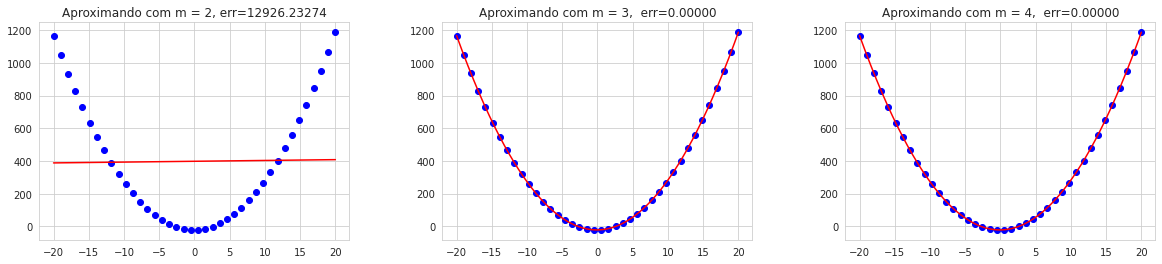

In [ ]:
x = np.linspace(-20,20,40)
y = (3*(x**2)) + (0.5*x) -22

plot_predictions(x, y, 2, 3, 4)

Como já esperávamos, como nossa $F$ foi gerada por uma função polinomial de segundo grau, a aproximação por uma reta não obteve nenhum resultado interessante. Os outros dois testes, no entanto, conseguiram aproximar a reta perfeitamente e isso se deve ao fato de que tanto $F$ quanto $y$ encontrado são pertencentes do mesmo espaço vetorial e, portanto, o sistema linear $Ax = B$ possui uma solução.

Vamos então, perturbar os valores de $f(x_i)$ de forma que o sistema se torne um Sistema Incompatível e possamos visualizar se o algoritmo consegiu encontrar uma aproximação satisfatória.

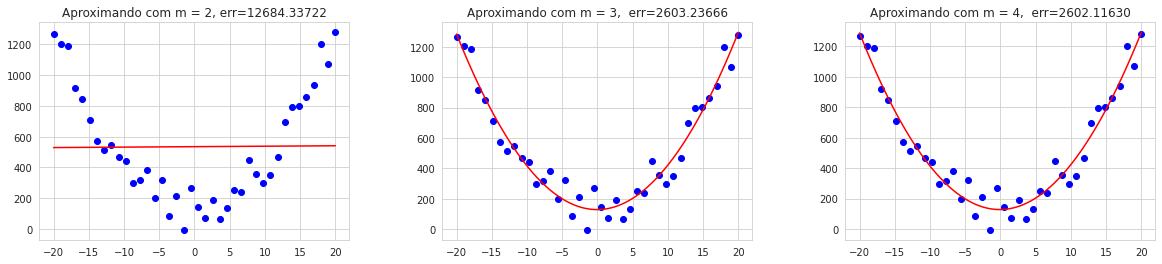

In [ ]:
# Pertubando os valores de Y aleatóriamente
for i in range(0, len(y)):
  y[i] += 300 * random.random()

plot_predictions(x, y, 2, 3, 4)

Como podemos ver, a aproximação linear continua não tendo um resultado bom, uma vez que a nuvem de pontos não apresenta um padrão linear. No entanto, vemos que os outros dois resultados conseguiram encontrar um polinômio de segundo e terceiro que se aproximaram da melhor maneira de todos os dados em $X$.

Iremos a partir de agora, trabalhar coms os dados obtidos no **Banco de Dados Climatólógicos** e que podem ser obtidos no link http://clima.icea.gov.br/clima/. Estaremos utilizando os dados das **Temperatura do Ar - Média Mensal em um Intervalo de Meses** da cidade de **Santos** a partir de **Jan/2000** até **Jan/2020**.

Podemos dar uma olhada no formato dos dados a seguir e vemos que os mesmos estão ordenados pela sua data de forma crescente.

In [ ]:
dados_santos = pd.read_csv('/content/Dados Metereológicos - Dados.csv')
dados_santos = dados_santos.replace(',','.',regex=True)
dados_santos.head(5)

,Ano,Mês,Valor(°C)
0,2000,Jan,26.66
1,2000,Fev,26.03
2,2000,Mar,25.67
3,2000,Abr,24.99
4,2000,Mai,23.05


A seguir, vamos ajustar os dados para serem utilizados pela biblioteca numpy e visualizar o formato dos dados durante os 3 primeiros anos de medições.

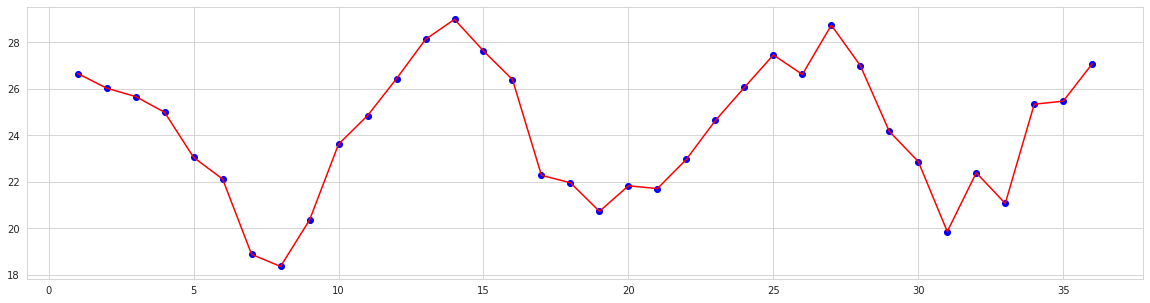

In [ ]:
y_full = np.asarray(dados_santos['Valor(°C)'],dtype=float)
x_full = np.linspace(1,len(y_full),len(y_full))

qtd_anos = 3
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]

plt.figure(figsize=(20,5))
plt.plot(x,y, 'bo')
plt.plot(x,y, 'r')

Como podemos ver, os dados possuem uma um formato periódico em que alterna entre temperatura crescente/decrescente em 5 pontos bastante distintos. 

Vamos então verificar se o método dos mínimos quadrados consegue encontrar algum polinômio que consiga se aproximar bem dos dados de $X_{1-6}$.

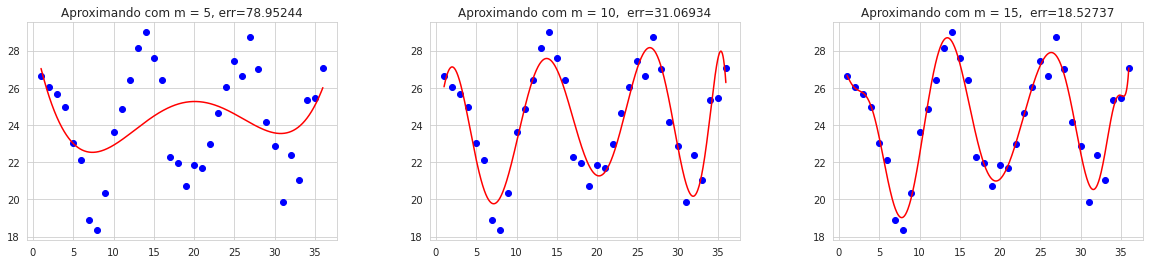

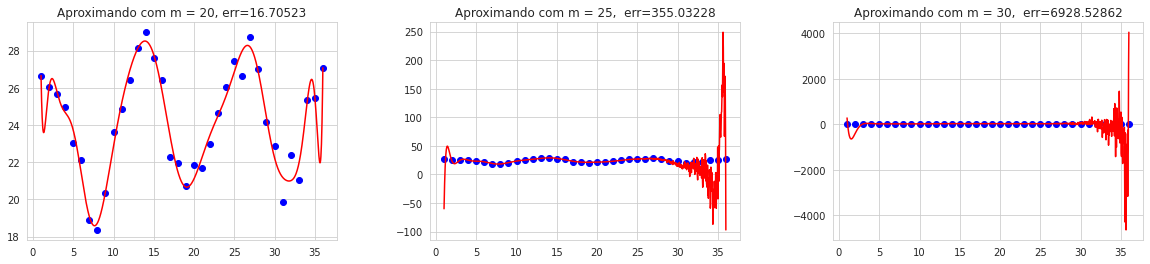

In [ ]:
plot_predictions(x, y, 5, 10, 15)
plot_predictions(x, y, 20, 25, 30)

Com os dados acima, podemos conseguir algumas conclusões:

**a)** Não necessáriamente utilizar um polinômio de grau maior irá garantir que o erro seja otimizado, como podemos ver quando $m=25$ e $m=30$.

**b)** Com $m=10$ já conseguimos ver uma boa aproximação dos dados e, a partir daí, o polinômio passa apenas à fazer ajustes para realizar pequenas melhorias no erro.

Vamos realizar a mesma análise, dessa vez com apenas os 2 primeiros anos.

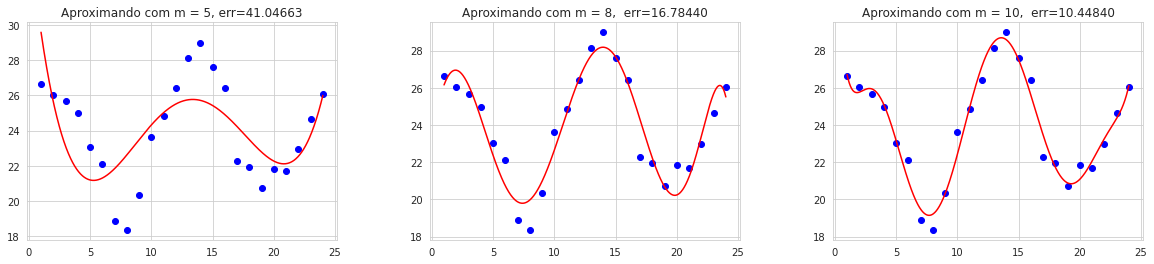

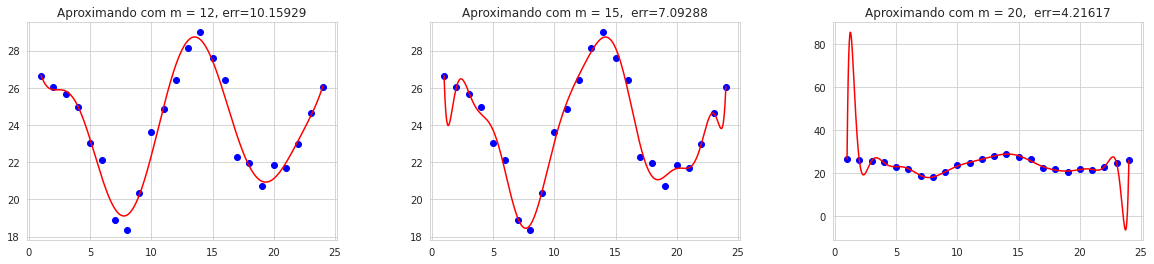

In [ ]:
qtd_anos = 2
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]

plot_predictions(x, y, 5, 8, 10)
plot_predictions(x, y, 12, 15, 20)

Novamente, vemos que há um mesmo comportamento em que quando $m\approx10$ ja há uma curva suave que aproxima os dados e, a partir de $m \geq 15$ o polinômio passa a tentar fazer sobreajustes para diminuir a distância $Q$. A curva suave, no entanto, ainda possui um erro muito melhor se comparado com os outros resultados.

Vamos fazer então uma função `calc_errors` que irá testar todos os possíveis valores de $m$ em um dado intervalo $[m_{min},m_{max}]$ e calcular o erro associado à cada uma das tentativas.

In [ ]:
def calc_errors(x,y, m_max, m_min = 2):
  E = []
  M = []
  for m in range(m_min, m_max+1):
    coefs   = lstqs_polinomial(x,y,m)
    y_pred  = get_y(x,coefs)
    err     = sum(abs(y_pred - y))
    
    M.append(m)
    E.append(err)
  return (M, E)

A seguir vamos calcular a relação $(m,Q(m))$, à esquerda iremos mostrar como o erro se comporta ao variar o valor de $m$ e, dado o valor de $m_0$ que otimiza o erro, vamos verificar o polinômio gerado para $P_{m_0}$. Neste caso
$X$ irá corresponder aos dados dos primeiros 3 anos.

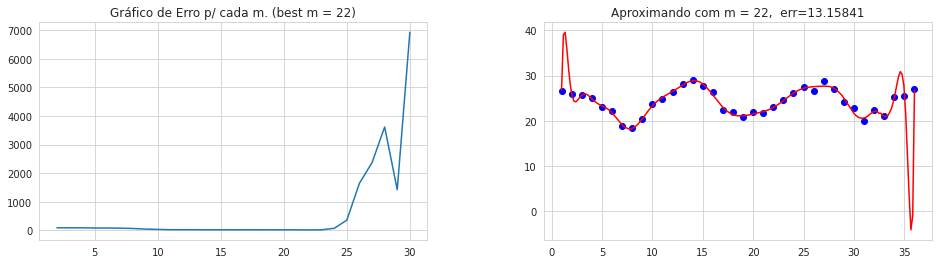

In [ ]:
qtd_anos = 3
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]


# Calculando erros para diferentes valores de m
(M,E)  = calc_errors(x,y, 30)
best_m = np.argmin(E)

# Calculando com o melhor coef
coefs   = lstqs_polinomial(x,y,M[best_m])
y_pred  = get_y(x,coefs)
err     = sum(abs(y_pred - y))

x_pred  = np.linspace(x[0],x[-1],200)
y_pred  = get_y(x_pred,coefs)

# Plotando o resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)


ax1.plot(M,E)
ax1.set_title("Gráfico de Erro p/ cada m. (best m = {})".format(M[best_m]))

ax2.plot(x,y,   'bo')
ax2.plot(x_pred,y_pred, 'r')
ax2.set_title("Aproximando com m = {},  err={:.5f}".format(M[best_m], err))
plt.show()

Como já haviamos apontado anteriormente, a partir de $m \approx 25$ o gráfico de erro explode e o polinômio se torna ineficiente em aproximar $F(x_i)$. Vamos dar uma olhada então nos resultados de $m \in [2,20]$.

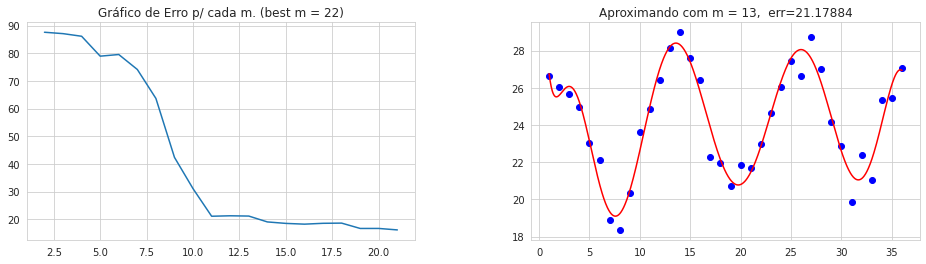

In [ ]:
coefs   = lstqs_polinomial(x,y,13)
y_pred  = get_y(x,coefs)
err     = sum(abs(y_pred - y))

x_pred  = np.linspace(x[0],x[-1],1000)
y_pred  = get_y(x_pred,coefs)

# Plotando o resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(M[:20],E[:20])
ax1.set_title("Gráfico de Erro p/ cada m. (best m = {})".format(M[best_m]))

ax2.plot(x,y,   'bo')
ax2.plot(x_pred,y_pred, 'r')
ax2.set_title("Aproximando com m = {},  err={:.5f}".format(13, err))
plt.show()

Novamente, como já haviamos argumentado, quando $m \approx 10$ há uma quedra brusca no erro, indicando que o método encontrou um polinômio que se aproxima de maneira suave ao conjunto de dados. A partir de então há apenas pequenas melhorias conforme o grau de $P_m$ é aumentado.

Por fim, vamos verificar qual o melhor resultado encontrado levando em conta todo o conjunto de dados (ou seja, os 20 anos  * 12 meses de dados).

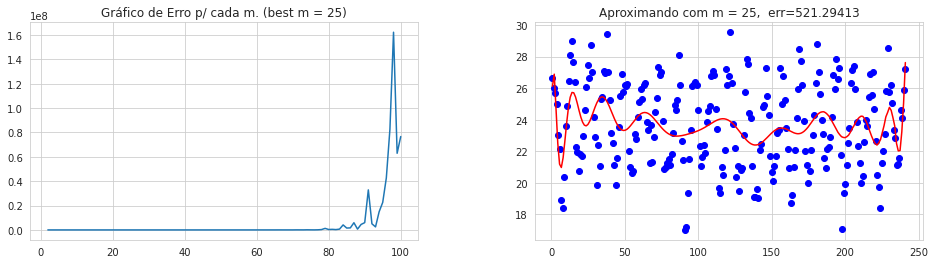

In [ ]:
x        = x_full
y        = y_full

# Calculando erros para diferentes valores de m
(M,E)  = calc_errors(x,y, 100)
best_m = np.argmin(E)

# Calculando com o melhor coef
coefs   = lstqs_polinomial(x,y,M[best_m])
y_pred  = get_y(x,coefs)
err     = sum(abs(y_pred - y))

x_pred  = np.linspace(x[0],x[-1],200)
y_pred  = get_y(x_pred,coefs)

# Plotando o resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)


ax1.plot(M,E)
ax1.set_title("Gráfico de Erro p/ cada m. (best m = {})".format(M[best_m]))

ax2.plot(x,y,   'bo')
ax2.plot(x_pred,y_pred, 'r')
ax2.set_title("Aproximando com m = {},  err={:.5f}".format(M[best_m], err))
plt.show()

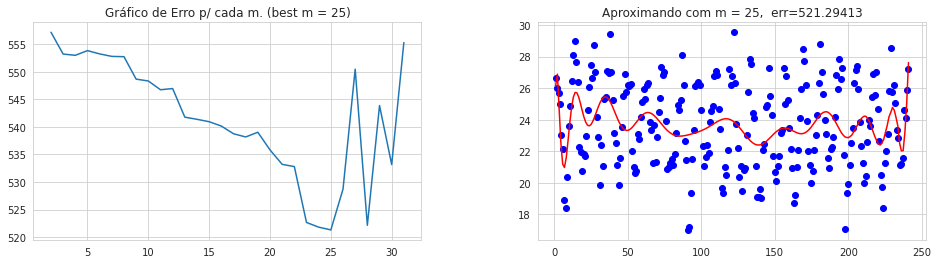

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(M[:30],E[:30])
ax1.set_title("Gráfico de Erro p/ cada m. (best m = {})".format(M[best_m]))

ax2.plot(x,y,   'bo')
ax2.plot(x_pred,y_pred, 'r')
ax2.set_title("Aproximando com m = {},  err={:.5f}".format(M[best_m], err))
plt.show()

Como podemos ver, a melhor aproximação polinomial encontrada se dá quando $m \approx 25$. A partir daí, o polinômio passa a tentar se ajustar mas os erros se tornam muito altos. Analisando graficamente o polinômio obtido com a nossa nuvem de dados, vemos que o resultado obtido não é tão satisfatório quanto gostariamos.

No entanto, existem outros espaços de funções que podemos testar a fim de encontrar uma solução satisfatória, e iremos ver uma delas agora.



# **Aproximação Polinomial Trigonométrica**


Seja $X$ um conjunto amostral de uma função $f(x)$ desconhecida contendo $(n+1)$ pares de pontos $(x_i, y_i)$, com $x_i$ todos distintos, Podemos expressar $f(x)$ como uma aproximação de um polinômio trigonométrico dado pela seguinte equação:

\begin{equation}
  f(x) \approx \dfrac{a_0}{2} + \sum_{k=1}^{m}(a_kcos(kx) + b_ksin(kx)) = S_m(x)
\end{equation}

Sendo $S_m \in T_m$ elemento do espaço vetorial de polinômios trigonométricos com as coordenadas $(a_0, a_1, ..., a_m, b_1, ..., b_m)$ e $T_m$ subspaço do espaço vetorial infinito de polinômios trigonométricos.


Queremos encontrar, portanto, um polinômio $S_m \in T_m$ que melhor aproxime os valores de $S_m(x_i) \approx f(x_i)$.

Teremos, portanto, um sistema linear do seguinte tipo:

\begin{cases} 
S_m(x_0) = \dfrac{a_0}{2} + \sum_{k=1}^{m}(a_kcos(kx_0) + b_ksin(kx_0)) \approx f(x_0) \\
S_m(x_1) = \dfrac{a_0}{2} + \sum_{k=1}^{m}(a_kcos(kx_1) + b_ksin(kx_1)) \approx f(x_1) \\
... \\
S_m(x_n) = \dfrac{a_0}{2} + \sum_{k=1}^{m}(a_kcos(kx_n) + b_ksin(kx_n)) \approx f(x_n) 
\end{cases} 

Podemos descrever esse problema na forma matricial $Ax = F$, em que $F = (f(x_0), f(x_1), ... , f(x_n)) \in \mathbb{R}^{n}$ e $x \in \mathbb{R}^{2m+1}$ representa a matriz coluna com os coeficientes $a_i$ e $b_i$ que queremos determinar.

Diferente do caso polinômial, a matriz A gerada nesse caso será fruto dos $m$ senos e cossenos desejados para realizar a aproximação e que consistem em uma **base ortogonal** para o espaço $T_m$.

Como já vimos anteriormente, podemos resolver o sistema acima ao achar a melhor aproximação de $x$ por meio da fórmula:

\begin{equation} A^TAy = A^TF \end{equation}

Porém, como as colunas de $A$ são ortogonais, teremos que $A^TA$ resultará em uma matriz diagonal cujos valores são:

\begin{cases} 
a_{ij} = 0, se \space i \neq j \\
a_{ij} = \dfrac{M}{2}, se \space i=j=0 \\
a_{ij} = M, se \space i=j \gneq 0 \\
\end{cases} 

Com isso, podemos resolver tanto a equação linear formada quanto podemos utilizar previamente as fórmulas derivadas do sistema para computar os valores de cada $a_i$ e $b_i$ tal que:

\begin{equation} 
a_0 = \dfrac{1}{M}\sum_{k=0}^{2n}f(x_k) \\
a_i = \dfrac{1}{M}\sum_{k=0}^{2n}f(x_k)cos(ix_k) \\
b_i = \dfrac{1}{M}\sum_{k=0}^{2n}f(x_k)sin(ix_k) \\
\end{equation} 

A seguir implementamos o cálculo dos coeficientes das duas maneiras. `lstqs_trigonometrico` resolve o sistema de matrizes $A^TAy = A^TF$ enquanto `lstqs_trigonometrico2` calcula os coeficientes diretamente pelas fórmulas.

In [ ]:
def lstqs_trigonometrico(x, y, n = 2):
  X = np.eye((2*n)+1) * n 
  X[0,0] = X[0,0]/2
  Y      = np.zeros( ((2*n)+1,1) )
  Y[0,0] = sum(y/2)
  for i in range(1, n+1):
    Y[i,0]   = np.dot( np.cos((i * x)), y)
    Y[n+i,0] = np.dot( np.sin((i * x)), y)
  
  return np.linalg.solve(X,Y).flatten()

In [ ]:
def lstqs_trigonometrico2(x, y, n = 2):
  C    = np.zeros( (1,(2*n)+1)).flatten()
  C[0] = sum(y) / n

  for i in range(1, n+1):
    C[i]   =  np.sum(np.cos((i*x)) * y) /n
    C[n+i] =  np.sum(np.sin((i*x)) * y) /n

  return C

Já deixaremos pronto também a função `get_y_trigo` que, assim como a `get_y` polinomial, gera novos pontos $f_{p}(x_i)$ baseado nos dados $x_i$ e nos coeficientes gerados pela aproximação trigonométrica.

In [ ]:
def get_y_trigo(x, coefs):
  n   = int((len(coefs)-1)/2)
  y   = np.zeros(len(x)) + (coefs[0]/2)
  for i in range(1,n+1):
    y += (coefs[i]*np.cos(i * x)) + (coefs[n+i]*np.sin(i * x))
  return y

Assim como fizemos com a aproximação polinomial, vamos verificar se a aproximação está conseguindo acertar os valores dos coeficiêntes dado um conjunto $X = \{(x_i, f(x_i))\}$ em que $f(x) = 10\cos(x) + 5\sin(x)$

In [ ]:
x = np.linspace(-10,10,20)
y = (10 * np.cos(x)) + (5 * np.sin(x))
coefs  = lstqs_trigonometrico(x, y, n=100)
coefs2 = lstqs_trigonometrico2(x, y, n=100)

y_pred_1 = get_y_trigo(x, coefs)
y_pred_2 = get_y_trigo(x, coefs2)
print('f(x) original: ', y[:5])
print('f_p(x):        ', y_pred_1[:5])

print('Erro:', np.sum(y_pred_1 - y))
print('Erro:', np.sum(y_pred_2 - y))

f(x) original:  [ -5.67060974 -11.17928118  -5.40328737   5.82692913  11.17528762]
f_p(x):         [ -5.3040155  -10.7809705   -5.53666571   5.82261931  11.17624777]
Erro: 0.9560534236936853
Erro: 0.9560534236936702


Como podemos ver, utilizando a combinação dos 100 primeiros senos e cossenos já conseguimos uma aproximação boa dos dados originais. Vamos então criar uma função para analisar graficamente o conjunto de dados com o polinômio trigonométrico encontrado como fizemos com as aproximações polinomiais.

In [ ]:
def plot_predictions_trigo(x,y, n1=2, n2=3, n3=4):
  # aproximando por n1
  coefs = lstqs_trigonometrico2(x,y,n1)
  y_1   = get_y_trigo(x,coefs)
  err_1 = sum(abs(y_1 - y))

  # Aproximando por n2
  coefs = lstqs_trigonometrico2(x,y,n2)
  y_2   = get_y_trigo(x,coefs)
  err_2 = sum(abs(y_2 - y))

  # Aproximando por n3
  coefs = lstqs_trigonometrico2(x,y,n3)
  y_3   = get_y_trigo(x,coefs)
  err_3 = sum(abs(y_3 - y))

  # Plotando os resultados obtidos
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
  plt.subplots_adjust(wspace=0.3, hspace=0.2)

  ax1.plot(x,y,   'bo')
  ax1.plot(x,y_1, 'r')
  ax1.set_title("Aproximando com n = {}, err={:.5f}".format(n1, err_1))

  ax2.plot(x,y,   'bo')
  ax2.plot(x,y_2, 'r')
  ax2.set_title("Aproximando com n = {},  err={:.5f}".format(n2, err_2))

  ax3.plot(x,y,   'bo')
  ax3.plot(x,y_3, 'r')
  ax3.set_title("Aproximando com n = {},  err={:.5f}".format(n3, err_3))
  plt.show()

Testando dferentes valores nos conjuntos de dados anteriores, vamos analisar o que acontece conforme vamos incrementando a quantidade de senos e cossenos utilizados para aproximar $f$.

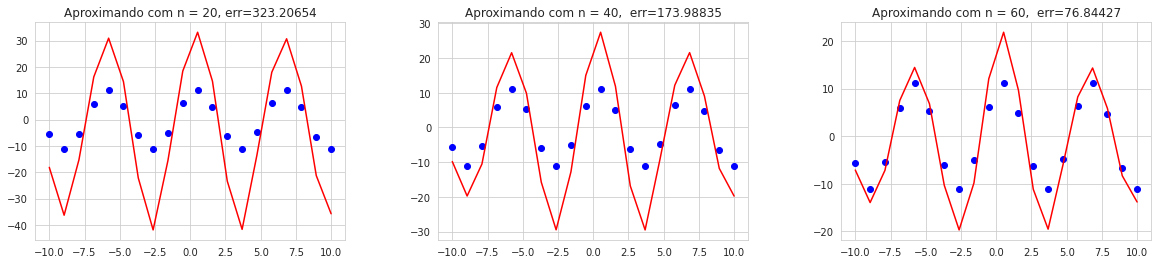

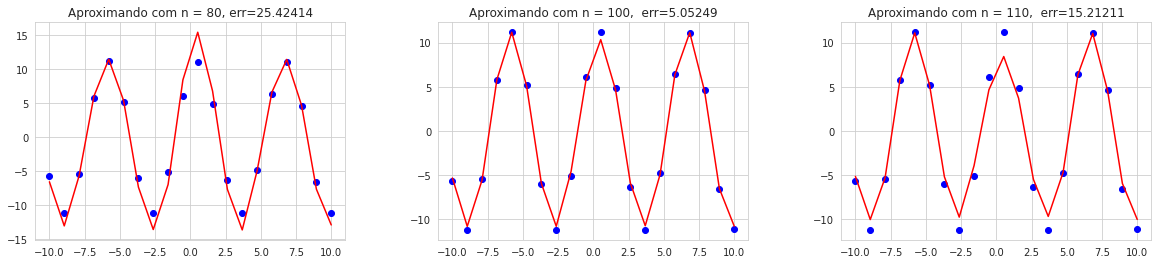

In [ ]:
plot_predictions_trigo(x, y, 20, 40, 60)
plot_predictions_trigo(x, y, 80, 100, 110)

Como podemos ver, a aproximaçao feita com $n\approx100$ consegue se aproximar bem da função periódica $f$. Vamos analisar agora como esse método irá lidar com os dados dos 3 e 4 primeiros anos de $X$.



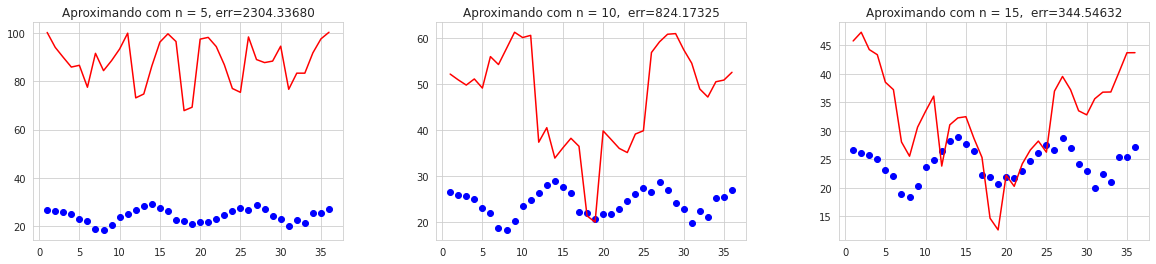

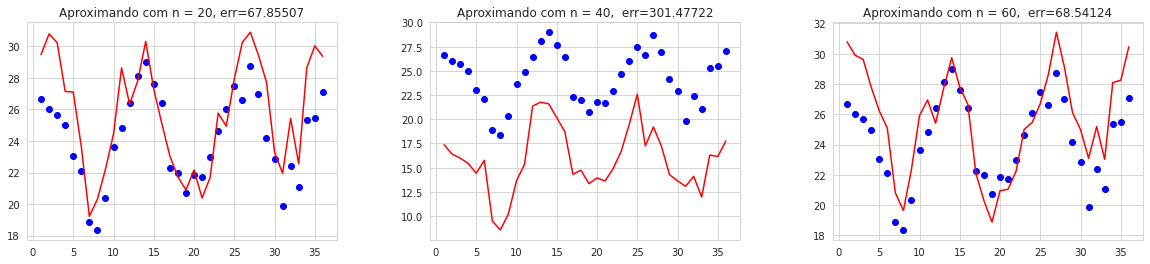

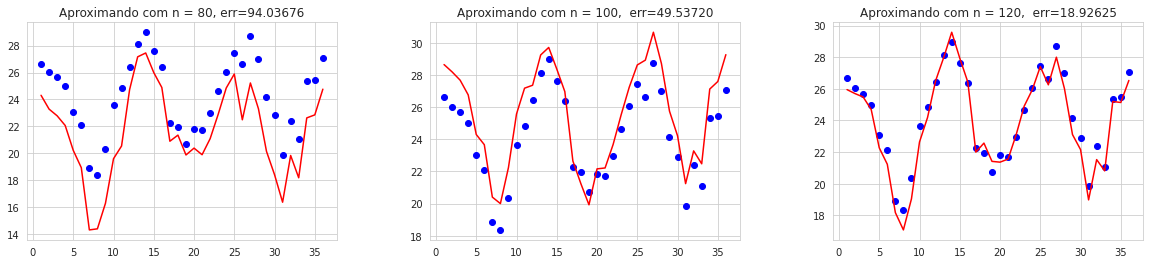

In [ ]:
qtd_anos = 3
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]

plot_predictions_trigo(x, y, 5, 10, 15)
plot_predictions_trigo(x, y, 20, 40, 60)
plot_predictions_trigo(x, y, 80, 100, 120)

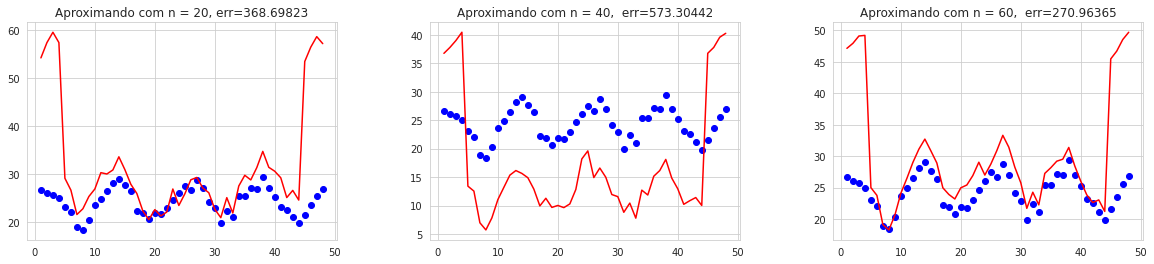

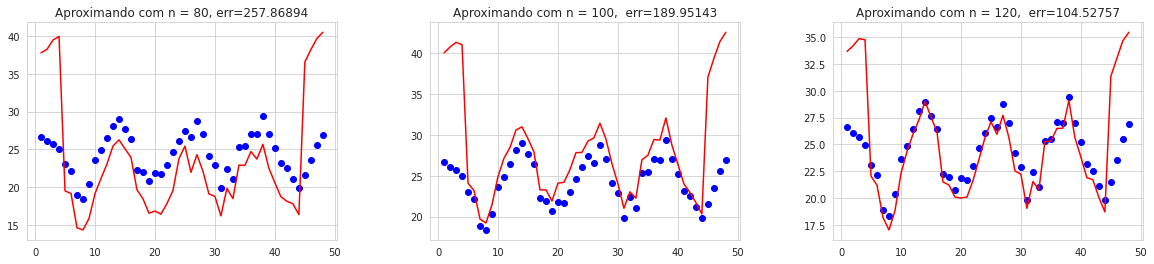

In [ ]:
qtd_anos = 4
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]

plot_predictions_trigo(x, y, 20, 40, 60)
plot_predictions_trigo(x, y, 80, 100, 120)

Como podemos ver, existem alguns valores de $m$ que se aproximam dos resultados que o método polinomial atingia. Vamos fazer agora uma análise de como o erro varia conforme vamos mudando a quantidade $n$ de senos e cossenos utilizada.

`calc_errors_trigo` é análoga à `calc_errors` e irá nos retornar o erro associado à cada valor de $n \in [n_{min}, n_{max}]$ testado.

In [ ]:
def calc_errors_trigo(x,y, n_max, n_min = 2):
  E = []
  N = []
  for n in range(n_min, n_max+1):
    coefs   = lstqs_trigonometrico2(x,y,n)
    y_pred  = get_y_trigo(x,coefs)
    err     = sum(abs(y_pred - y))
    
    N.append(n)
    E.append(err)
  return (N, E)

Testando o comportamento do erro nos dados dos 6 primeiros anos de $X$, teremos o seguinte gráfico (à direita o gráfico da aproximação cujo `n` retornou o menor erro $Q$).

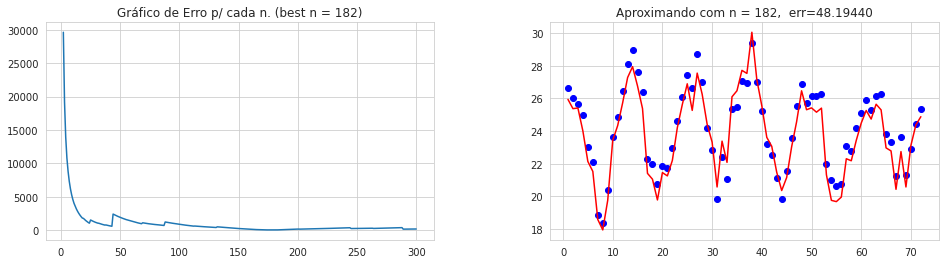

In [ ]:
qtd_anos = 6
x = x_full[:12*qtd_anos]
y = y_full[:12*qtd_anos]

# Calculando erros para diferentes valores de m
(N,E)  = calc_errors_trigo(x,y, 300)
best_n = np.argmin(E)

# Calculando com o melhor coef
coefs   = lstqs_trigonometrico2(x,y,N[best_n])
y_pred  = get_y_trigo(x,coefs)
err     = sum(abs(y_pred - y))

# Plotando o resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(N,E)
ax1.set_title("Gráfico de Erro p/ cada n. (best n = {})".format(N[best_n]))

ax2.plot(x,y,   'bo')
ax2.plot(x,y_pred, 'r')
ax2.set_title("Aproximando com n = {},  err={:.5f}".format(N[best_n], err))
plt.show()

Como podemos ver, ao contrário da aproximação polinomial, conforme aumentamos o valor do intervalo o erro parece estabilizar chegando em um platô e não melhorando mais. Vamos olhar mais de perto o intervalo ao redor de $m\approx180$

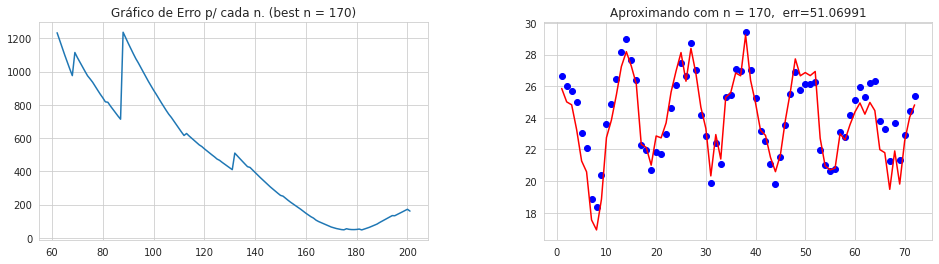

In [ ]:
coefs   = lstqs_trigonometrico2(x,y,180)
y_pred  = get_y_trigo(x,coefs)
err     = sum(abs(y_pred - y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(N[60:200],E[60:200])
ax1.set_title("Gráfico de Erro p/ cada n. (best n = {})".format(170))

ax2.plot(x,y,   'bo')
ax2.plot(x,y_pred, 'r')
ax2.set_title("Aproximando com n = {},  err={:.5f}".format(170, err))
plt.show()

Por fim, vamos buscar como a aproximação polinomial se comporta tentando otimizar com todos os dados de $X$.

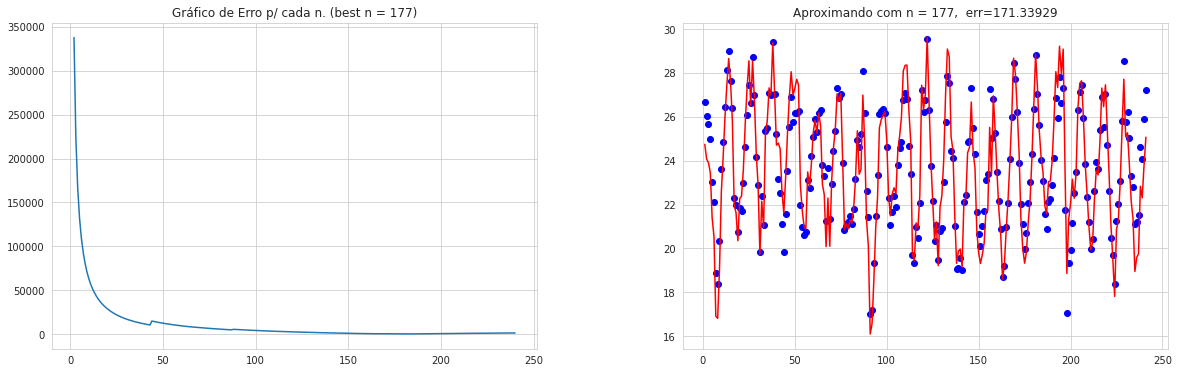

In [ ]:
x        = x_full
y        = y_full

# Calculando erros para diferentes valores de m
(N,E)  = calc_errors_trigo(x,y, 240)
best_n = np.argmin(E)

# Calculando com o melhor coef
coefs   = lstqs_trigonometrico2(x,y,N[best_n])
y_pred  = get_y_trigo(x,coefs)
err     = sum(abs(y_pred - y))

# Plotando o resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(N,E)
ax1.set_title("Gráfico de Erro p/ cada n. (best n = {})".format(N[best_n]))

ax2.plot(x,y,   'bo')
ax2.plot(x,y_pred, 'r')
ax2.set_title("Aproximando com n = {},  err={:.5f}".format(N[best_n], err))
plt.show()

Como podemos ver, a otimização da aproximação trigonométrica conseguiu encontrar resultados muito mais próximos de $f(x_i)$ do que o método polinomial. Sendo, portanto, uma outra alternativa possível para aproximar os dados utilizando os Mínimos Quadrados.

# **Conclusão**

Neste relatório conseguimos revisar os Métodos dos Mínimos Quadrados utilizando funções polinômiais e polinômios trigonométricos, aplicando os conceitos e técnicas de Álgebra Linear e Métodos Numéricos para soluções de sistemas lineares a fim de encontrar uma função que melhor se aproxime ao conjunto de dados informado.

Obviamente, nenhum dos dois métodos conseguiu realizar uma aproximação perfeita dos dados utilizados (uma vez que a temperatura de um local é influenciada por muitos outros fatores além do tempo), porém foi possível analisar como os dois diferentes métodos geraram funções que se ajustaram de maneiras diferentes devido à forma que foram concebidos e que podem, portanto, ser utilizados de acordo com a nessecidade e a natureza dos dados $(x_i,y_i)$ conhecidos em diversos outros problemas.